# **Contexto**
<span style="font-size:16pt;">
É importante que as empresas de cartão de crédito sejam capazes de reconhecer transações fraudulentas de cartão de crédito para que os clientes não sejam cobrados por itens que não compraram
nte
O conjunto de dados contém transações efetuadas com cartões de crédito em setembro de 2013 por titulares de cartões europeus.
Este conjunto de dados apresenta transações ocorridas em dois dias, onde temos 492 fraudes em 284.807 transações. O conjunto de dados é altamente desequilibrado, a classe positiva (fraudes) representa 0,172% de todas as transações.

Ele contém apenas variáveis ​​de entrada numéricas que são o resultado de uma transformação PCA. Devido a questões de confidencialidade, não é possível fornecer os recursos originais e mais informações básicas sobre os dados. As características V1, V2,… V28 são os principais componentes obtidos com PCA, as únicas características que não foram transformadas com PCA são 'Tempo' e 'Quantidade'. O recurso 'Tempo' contém os segundos decorridos entre cada transação e a primeira transação no conjunto de dados. O  'Valor' é o valor da transação; esse recurso pode ser usado para aprendizado sensível ao custo, dependente de exemplo. O recurso 'Classe' é a variável de resposta e assume valor 1 em caso de fraude e 0 caso contrário</span>

<span style="font-size:16pt;">O download do arquivo csv que foi usado pode ser feito pelo link:


https://www.kaggle.com/datasets/mlg-ulb/creditcardfraud </span>trário.fication.

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
dados = pd.read_csv('creditcard.csv')
dados.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


<span style="font-size:15pt;">Podemos notar que a distribuição de dados entre fráude e não fráude está bastante desbalanceada</span>

Text(0.5, 1.0, 'Frequência de fraudes e não fraudes')

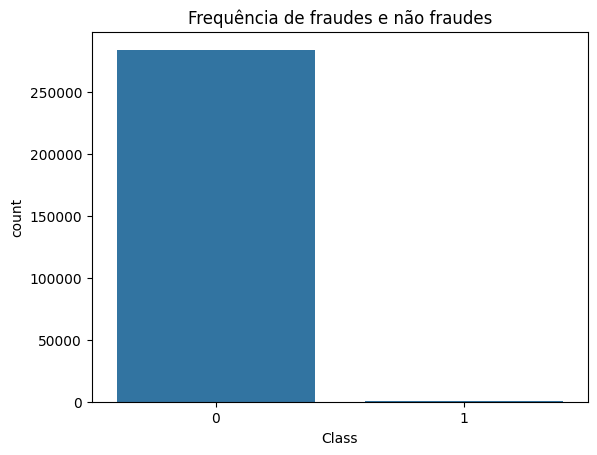

In [3]:
sns.countplot(data = dados, x = 'Class').set_title('Frequência de fraudes e não fraudes')

In [4]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
dados['NormalAmount'] = scaler.fit_transform(np.array(dados['Amount']).reshape(-1,1))
dados = dados.drop(['Time', 'Amount'], axis = 1)
dados.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,NormalAmount
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


<span style="font-size:15pt;">Para lidar com os dados desbalanceados sem que o nosso modelo fique super ajustado, devemos coletar amostras balanceadas entre fráude e não fraude para que o nosso modelo seja treinado</span>

In [20]:
#distribuindo os dados totais em treino e teste para aplicar o modelo já treinado com as amostras
from sklearn.model_selection import train_test_split
X = dados.loc[:, dados.columns != 'Class']
y = dados.loc[:, dados.columns == 'Class']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3, random_state = 0)

In [6]:
n_frauds = len(dados.loc[dados['Class'] == 1])
frauds_indices = np.array(dados.loc[dados['Class'] == 1].index)

normal_indices = np.array(dados.loc[dados['Class'] == 0].index)

randon_normal_indices = np.random.choice(normal_indices, n_frauds, replace = False)
randon_normal_indices = np.array(randon_normal_indices)

under_sample_indices = np.concatenate([randon_normal_indices, frauds_indices])

under_sample_data = dados.iloc[under_sample_indices, :]

y_undersample = under_sample_data.pop('Class')
X_undersample = under_sample_data

<span style="font-size:15pt;">Após a coleta das amostras, dividiremos os dados entre treino e teste para que possamos aplicar o nosso modelo de regressão logística</span>

In [7]:
X_train_undersample , X_test_undersample, y_train_undersample, y_test_undersample = train_test_split(X_undersample, y_undersample, test_size = 0.3, random_state = 0)

In [8]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix ,classification_report 

<span style="font-size:15pt;">Agora o vamos criar o modelo de regressão logística e treina-lo com os dados das nossas amostras</span>

In [9]:
modelo = LogisticRegression(C = 0.1, penalty = 'l2')
modelo.fit(X_train_undersample, y_train_undersample.values.ravel())

y_pred_undersample = modelo.predict(X_test_undersample.values)

print(classification_report(y_test_undersample, y_pred_undersample))

              precision    recall  f1-score   support

           0       0.91      0.95      0.93       147
           1       0.95      0.91      0.93       149

    accuracy                           0.93       296
   macro avg       0.93      0.93      0.93       296
weighted avg       0.93      0.93      0.93       296



C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<span style="font-size:15pt">Podemos ver que o nosso modelo teve bons resultados nas métricas de precisão e revocação(precision e racall) com os dados das amostras, a seguir vamos ver como ele se sai com a base de dados completa</span>

<span style="font-size:15pt;">Com o modelo já treinado com as amostras balanceadas, podemos utilizar com a nossa base de dados para ver os resultados</span>

In [10]:
y_pred = modelo.predict(X_test.values)
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.97      0.99     85296
           1       0.05      0.92      0.10       147

    accuracy                           0.97     85443
   macro avg       0.53      0.95      0.54     85443
weighted avg       1.00      0.97      0.98     85443



C:\Users\Usuario\anaconda3\Lib\site-packages\sklearn\base.py:439: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


<span style="font-size:15pt;">Agora podemos ver que o modelo também obteve bons resultados com a base de dados completa.
A seguir vamos montar as matrizes de confusão do modelo utilizando as amostras e os dados reais:</span>

In [11]:
confusao = confusion_matrix(y_test_undersample, y_pred_undersample)
confusao

array([[140,   7],
       [ 14, 135]], dtype=int64)

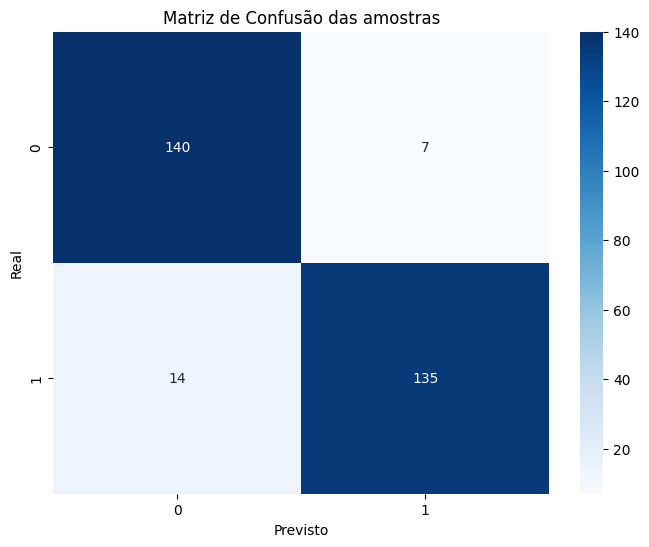

In [12]:
classes = ['0', '1']

# Crie o heatmap da matriz de confusão
plt.figure(figsize=(8, 6))
sns.heatmap(confusao, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão das amostras')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()

In [13]:
confusao2 = confusion_matrix(y_test, y_pred)
confusao2

array([[82912,  2384],
       [   12,   135]], dtype=int64)

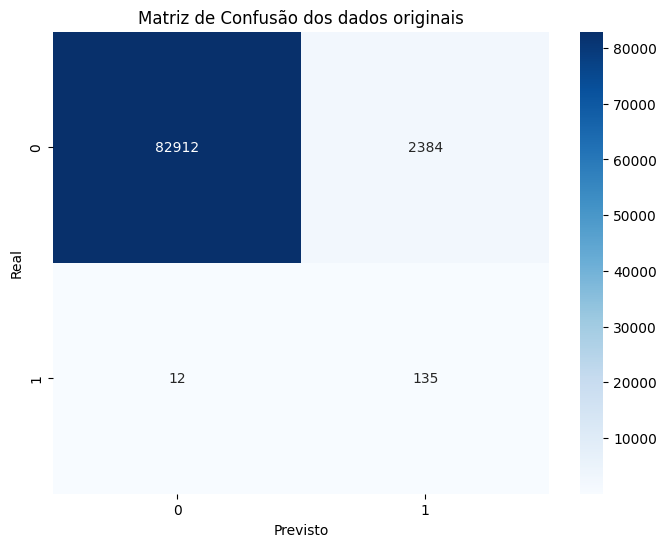

In [14]:
classes = ['0', '1']
plt.figure(figsize=(8, 6))
sns.heatmap(confusao2, annot=True, fmt="d", cmap="Blues", xticklabels=classes, yticklabels=classes)
plt.title('Matriz de Confusão dos dados originais')
plt.xlabel('Previsto')
plt.ylabel('Real')
plt.show()